In [453]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

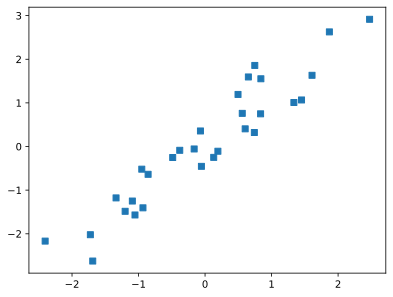

In [454]:
# create data
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [455]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(),      # nonlinear activation
    nn.Linear(1,1)  # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [456]:
learningRate = 0.05
lossfun = nn.MSELoss()
# flavor of gradient descent
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

In [457]:
epochs = 500
losses = torch.zeros(epochs)

for epoch in range(epochs):
    # forward prop
    yhat = ANNreg(x)

    # compute loss
    loss = lossfun(yhat,y)
    losses[epoch] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

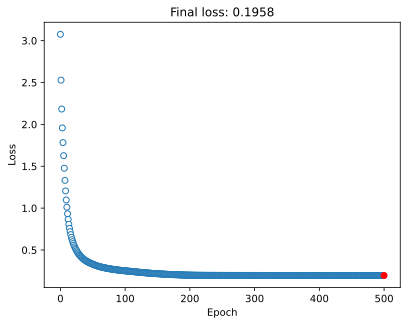

In [458]:
# manually compute loss
# final forward prop
predictions = ANNreg(x)
# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(epochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss: {:.4f}'.format(testloss.item()))
plt.show()

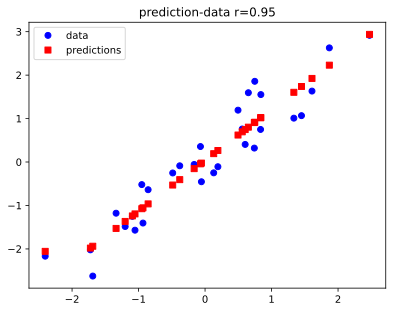

In [459]:
plt.plot(x,y,'bo', label='data')
plt.plot(x,predictions.detach(),'rs', label='predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()